In [2]:
!pip install keras

In [35]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from numpy import array, sqrt, array
from numpy.random import uniform
from numpy import hstack
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [39]:
def create_data(n):
 x1 = array([i/100-uniform()*10 for i in range(n)]).reshape(n,1)
 x2 = array([i/100+uniform()*5 for i in range(n)]).reshape(n,1)
 x3 = array([i/200+uniform()-5 for i in range(n)]).reshape(n,1)

 y1= [x1[i]/2+x2[i]+x3[i]+uniform() for i in range(n)]
 y2= [x1[i]-x2[i]*2-x3[i]/2-5-uniform() for i in range(n)]
 X = hstack((x1, x2, x3))
 Y = hstack((y1, y2))

 print(X.dtype)
 print(Y.dtype)   
 return X, Y

float64
float64
[[-8.18897277  0.96084871 -4.33268416]
 [-7.56807615  1.88556032 -4.43073436]
 [-2.69778465  2.76515869 -4.94791838]
 ...
 [ 1.88382721  5.99398044 -2.03619469]
 [ 3.45462144  7.82338918 -2.87574255]
 [ 4.11650465  7.28437997 -2.25235811]]
[[-7.08164787e+00 -1.36420821e+01]
 [-6.18238718e+00 -1.43548719e+01]
 [-2.61660889e+00 -1.11758494e+01]
 [-4.35054985e+00 -1.19913469e+01]
 [-2.02089014e+00 -1.62288485e+01]
 [-7.14929011e+00 -1.35526851e+01]
 [-3.63701053e+00 -8.36922558e+00]
 [-3.75178939e+00 -1.14934512e+01]
 [-5.49398612e+00 -1.31201648e+01]
 [-2.42062084e+00 -7.79645030e+00]
 [-3.60738007e+00 -1.36802947e+01]
 [-8.21451003e+00 -1.28917202e+01]
 [-3.68562432e-01 -1.23407515e+01]
 [-1.04413725e+00 -1.69947159e+01]
 [-3.64263394e+00 -1.38640624e+01]
 [-5.31646817e+00 -1.40188292e+01]
 [-7.07527304e+00 -1.20574790e+01]
 [-3.79968682e+00 -2.00439115e+01]
 [-7.01958399e+00 -1.52177620e+01]
 [-4.95975941e+00 -8.64268593e+00]
 [-1.42944536e+00 -1.81797461e+01]
 [-2.2059

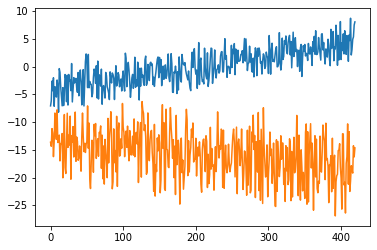

In [41]:
N = 420
x, y = create_data(N)

print(x)
print(y)
 

plt.plot(y)
plt.show()

In [30]:
n = 400

xtrain, xtest = x[0:n,:], x[n:N,:]
ytrain, ytest = y[0:n,:], y[n:N,:]

In [31]:
def convertData(datax, datay, step):
 X, Y = [], []
 for i in range(len(datax)-step):
  d = i+step  
  X.append(datax[i:d,])
  Y.append(datay[d])
 return array(X), array(Y)

In [32]:
step = 2
testx,testy = convertData(xtest,ytest, step)
trainx,trainy = convertData(xtrain,ytrain, step)

print("test-x:", testx.shape, "test-y:", testy.shape)
print("train-x:", trainx.shape, "train-y:", trainy.shape)

test-x: (18, 2, 3) test-y: (18, 2)
train-x: (398, 2, 3) train-y: (398, 2)


In [20]:

in_dim = trainx.shape[1:3]
out_dim = trainy.shape[1]

print(in_dim)
print(out_dim)


(2, 3)
2


In [21]:
model = Sequential()
model.add(SimpleRNN(units=100, input_shape=in_dim, activation="relu")) 
model.add(Dense(16, activation="relu")) 
model.add(Dense(out_dim))
model.compile(loss='mse', optimizer='adam') 

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 100)               10400     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1616      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 34        
Total params: 12,050
Trainable params: 12,050
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(trainx,trainy, epochs=50, verbose=2)
trainScore = model.evaluate(trainx, trainy, verbose=0)
print(trainScore)

Epoch 1/50
13/13 - 1s - loss: 119.1396
Epoch 2/50
13/13 - 0s - loss: 88.0791
Epoch 3/50
13/13 - 0s - loss: 52.9758
Epoch 4/50
13/13 - 0s - loss: 30.2041
Epoch 5/50
13/13 - 0s - loss: 18.5215
Epoch 6/50
13/13 - 0s - loss: 15.8534
Epoch 7/50
13/13 - 0s - loss: 15.2644
Epoch 8/50
13/13 - 0s - loss: 14.5361
Epoch 9/50
13/13 - 0s - loss: 14.2939
Epoch 10/50
13/13 - 0s - loss: 13.9723
Epoch 11/50
13/13 - 0s - loss: 13.6972
Epoch 12/50
13/13 - 0s - loss: 13.6253
Epoch 13/50
13/13 - 0s - loss: 13.4374
Epoch 14/50
13/13 - 0s - loss: 13.3948
Epoch 15/50
13/13 - 0s - loss: 13.2117
Epoch 16/50
13/13 - 0s - loss: 13.1824
Epoch 17/50
13/13 - 0s - loss: 13.0709
Epoch 18/50
13/13 - 0s - loss: 13.1341
Epoch 19/50
13/13 - 0s - loss: 13.0926
Epoch 20/50
13/13 - 0s - loss: 12.9796
Epoch 21/50
13/13 - 0s - loss: 12.9410
Epoch 22/50
13/13 - 0s - loss: 12.9482
Epoch 23/50
13/13 - 0s - loss: 12.8057
Epoch 24/50
13/13 - 0s - loss: 12.8503
Epoch 25/50
13/13 - 0s - loss: 12.7393
Epoch 26/50
13/13 - 0s - loss: 12

In [23]:
predtest= model.predict(testx)

rmse_y1 = sqrt(mean_squared_error(testy[:,0], predtest[:,0]))
rmse_y2 = sqrt(mean_squared_error(testy[:,1], predtest[:,1]))
 

print("RMSE y1: %.2f y2: %.2f" % (rmse_y1, rmse_y2))

RMSE y1: 2.76 y2: 3.86


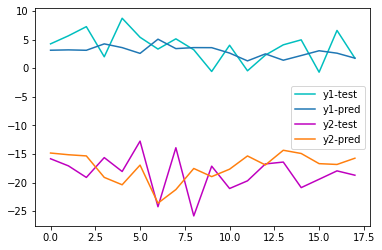

In [24]:
x_ax = range(len(testx))
plt.plot(x_ax, testy[:,0],  label="y1-test",color="c")
plt.plot(x_ax, predtest[:,0], label="y1-pred")
plt.plot(x_ax, testy[:,1],  label="y2-test",color="m")
plt.plot(x_ax, predtest[:,1], label="y2-pred")
plt.legend()
plt.show() 